In [ ]:
# Step 1: Install & Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Step 2: Load the Dataset
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))

# Step 3: Explore the Data
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


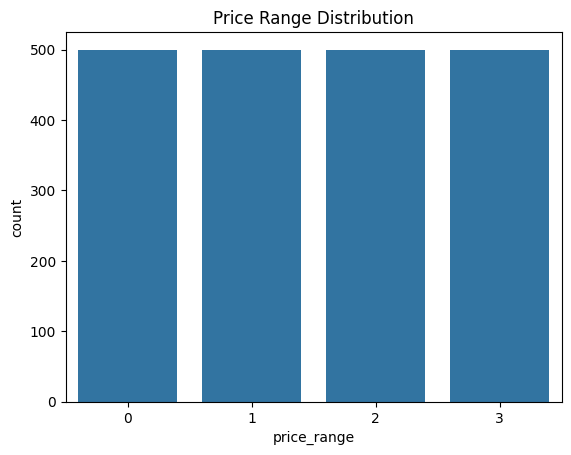

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Check class balance
sns.countplot(x='price_range', data=df)
plt.title("Price Range Distribution")
plt.show()

In [ ]:
# Separate features and target
X = df.drop('price_range', axis=1)
y = df['price_range']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Feature Scaling (Important for k-NN & Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Logistic Regression
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train_scaled, y_train)
log_pred = log_model.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))
print(classification_report(y_test, log_pred))

Logistic Regression Accuracy: 0.975
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       105
           1       0.94      1.00      0.97        91
           2       0.99      0.95      0.97        92
           3       0.97      0.99      0.98       112

    accuracy                           0.97       400
   macro avg       0.98      0.97      0.97       400
weighted avg       0.98      0.97      0.98       400



In [ ]:
#Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)

tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, tree_pred))
print(classification_report(y_test, tree_pred))

Decision Tree Accuracy: 0.8325
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       105
           1       0.75      0.84      0.79        91
           2       0.80      0.70      0.74        92
           3       0.86      0.90      0.88       112

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



In [ ]:
#k-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)

print("k-NN Accuracy:", accuracy_score(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

k-NN Accuracy: 0.53
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       105
           1       0.34      0.45      0.39        91
           2       0.35      0.37      0.36        92
           3       0.81      0.54      0.65       112

    accuracy                           0.53       400
   macro avg       0.55      0.52      0.53       400
weighted avg       0.57      0.53      0.54       400



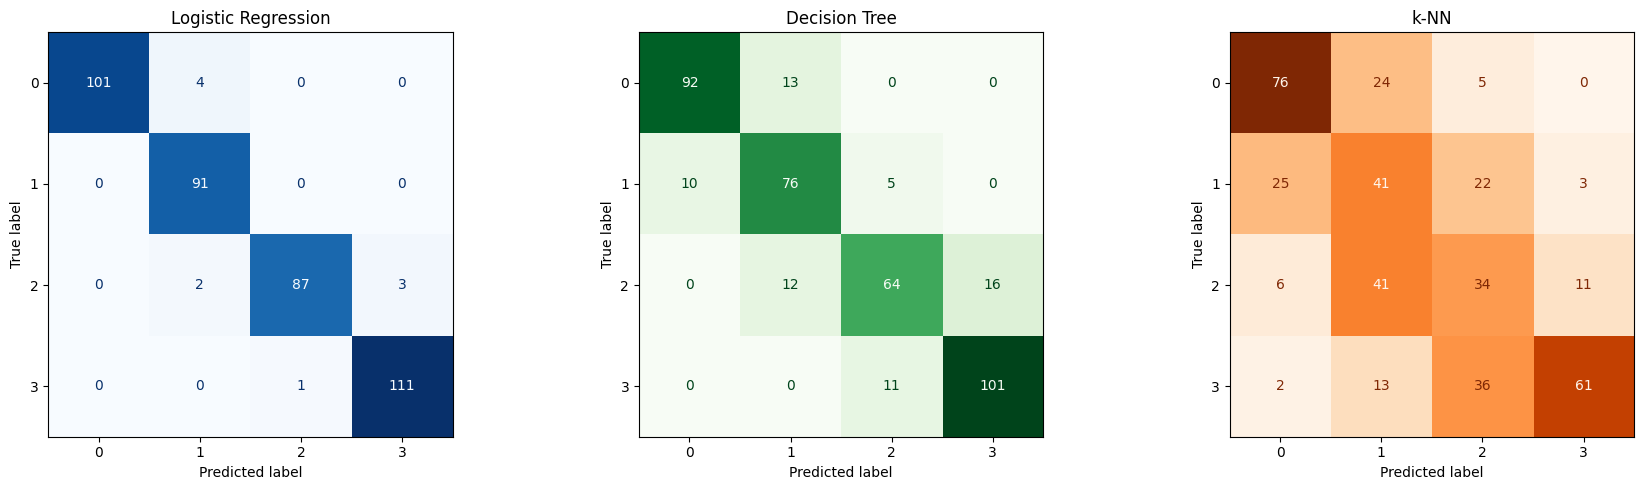

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on test data
lr_pred_test = log_model.predict(X_test_scaled)
dt_pred_test = tree_model.predict(X_test)          # Decision Tree (no scaling)
knn_pred_test = knn_model.predict(X_test_scaled)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Logistic Regression
ConfusionMatrixDisplay.from_predictions(
    y_test, lr_pred_test, ax=axes[0], cmap='Blues', colorbar=False
)
axes[0].set_title("Logistic Regression")

# Decision Tree
ConfusionMatrixDisplay.from_predictions(
    y_test, dt_pred_test, ax=axes[1], cmap='Greens', colorbar=False
)
axes[1].set_title("Decision Tree")

# k-NN
ConfusionMatrixDisplay.from_predictions(
    y_test, knn_pred_test, ax=axes[2], cmap='Oranges', colorbar=False
)
axes[2].set_title("k-NN")

plt.tight_layout()
plt.show()


In [ ]:
#Make Predictions for a New Mobile Device

# Example input values
new_mobile = {
    'battery_power': 1200,
    'blue': 1,
    'clock_speed': 1.8,
    'dual_sim': 1,
    'fc': 2,
    'four_g': 1,
    'int_memory': 16,
    'm_dep': 0.5,
    'mobile_wt': 140,
    'n_cores': 4,
    'pc': 8,
    'px_height': 600,
    'px_width': 1000,
    'ram': 2048,
    'sc_h': 12,
    'sc_w': 7,
    'talk_time': 10,
    'three_g': 1,
    'touch_screen': 1,
    'wifi': 1
}

# Convert to DataFrame
input_df = pd.DataFrame([new_mobile])

# Scale input for models that need it
input_scaled = scaler.transform(input_df)

# Predict using trained models
lr_pred = log_model.predict(input_scaled)[0]         # Logistic Regression
dt_pred = tree_model.predict(input_df)[0]            # Decision Tree (this is the correct name)
knn_pred = knn_model.predict(input_scaled)[0]        # k-NN

# Map numeric prediction to category name
price_map = {
    0: 'Low Cost',
    1: 'Medium Cost',
    2: 'High Cost',
    3: 'Very High Cost'
}

# Display results
print("\n🔮 Predicted Price Categories:")
print("Logistic Regression:", price_map[lr_pred])
print("Decision Tree:", price_map[dt_pred])
print("k-NN:", price_map[knn_pred])


🔮 Predicted Price Categories:
Logistic Regression: Medium Cost
Decision Tree: Medium Cost
k-NN: Low Cost
